<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Exercícios de Análise Exploratória de Dados</font>

 Essa lista de exercícios foi criada para que vocês possam aplicar os conhecimentos que vocês adquiriram na aula que assistiram.

Podem tirar dúvidas com **Tales Nobre** e **Felipe Duarte** quando quiserem!
**O prazo de envio do notebook é até a reunião da próxima semana, até 1 hora antes da reunião, podem enviar colocar o conteúdo na branch de vocês do repositório**



🌍 [Link do drive com todos os Datasets](https://drive.google.com/drive/folders/1LBZH7Zcch-f1tSmFgezIz7Z2QlWmNieP?usp=sharing)


###**Objetivos**


*   Entender o nível de conhecimento individual de vocês
*   Estimular vocês a praticarem os conceitos básicos de EDA


##**Observações**



*   Façam uma cópia desse notebook e realizem as questões.
*   Foquem no espaço de *Conclusões*, que aparece no final de cada questão, para explicar as conclusões que vocês chegaram a partir da análise de dados.
*   É permitido que vocês usem outras bibliotecas que acharem interessantes para realizar a EDA, mas tentem usar pelo menos em uma das questões as bibliotecas de *Pandas, Numpy e Plotly*.
*   É recomendável que vocês acessem os materiais de apoio que serão disponibilizados em seguida.
*   Prezem pela organização, é muito importante explicar cada etapa de execução, principalmente no contexto de análise de dados.
*   Claro que vocês não vão precisam importar várias vezes as bibliotecas dentro de um mesmo notebook, mas por fins educativos é recomendável que vocês façam isso nessa lista de exercícios!
*   As questões são progressivas, ou seja, a quantidade de instruções e o nível de dificuldade mudarão ao longo da lista. **Lembre-se de manter o mesmo padrão em todas as questões.**
*  Divida em quantas células e caixas de texto quiser, afim de deixar a legibilidade do código a melhor possível.



🐼 Material de apoio:


*   [Tutorial EDA Medium](https://medium.com/rumpydas/beginners-guide-to-eda-exploratory-data-analysis-on-a-real-data-set-using-numpy-pandas-in-python-c0cb4f63d50d)
*   [Tutorial EDA kaggle](https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python)
*   [Tutorial de EDA de forma aplicada](https://www.youtube.com/watch?v=-o3AxdVcUtQ)

📚Documentação das bibliotecas:
*   [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
*   [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html)
*   [Plotly](https://plotly.com/python/basic-charts/)
*   [Matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)
*   [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html#a-high-level-api-for-statistical-graphics)

Lembrem-se, a prática leva à perfeição!🧠

##**Questão 1:** *Desempenho dos Estudantes em Provas*

Analisando o desempenho dos estudantes em matemática, leitura e escrita no arquivo 'q1_estudantes.csv', investigue se há diferenças significativas nas pontuações com base no gênero dos estudantes e no nível de educação dos pais. Além disso, examine se a participação em cursos de preparação para testes está associada a pontuações mais altas nas avaliações.

### *1.1 Imports* 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *1.2 Dataset*

1. Defining the DataFrame and displaying it

In [58]:
df = pd.read_csv('q1_estudantes.csv')

In [59]:
df # Isso irá me mostrar a head(5) e a tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


2. Cleaning data

In [60]:
df.info() # É legal dar info() para ver os tipos de valor que estamos tratando
df.isnull().sum() # Aparentemente o dataset não possui valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [61]:
# Apesar disso existe uma coluna que é interessante mudarmos os valores a fim não causar futuros conflitos, a coluna 'test preparation course' tem valores "none" e podemos trocá-los...
df['test preparation course'] = df['test preparation course'].replace({'completed': True, 'none': False})
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,False,72,72,74
1,female,group C,some college,standard,True,69,90,88
2,female,group B,master's degree,standard,False,90,95,93
3,male,group A,associate's degree,free/reduced,False,47,57,44
4,male,group C,some college,standard,False,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,True,88,99,95
996,male,group C,high school,free/reduced,False,62,55,55
997,female,group C,high school,free/reduced,True,59,71,65
998,female,group D,some college,standard,True,68,78,77


<Axes: xlabel='math score'>

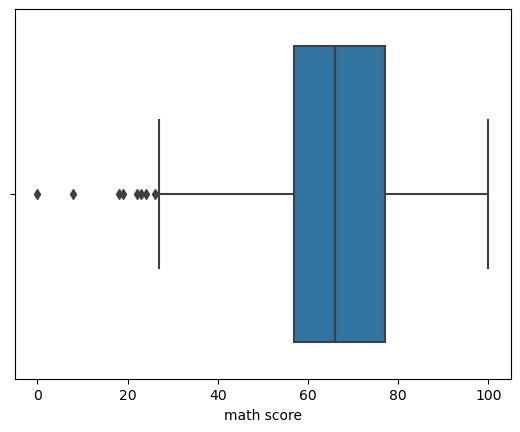

In [7]:
# Aqui nós também podemos identificar Outliers e poderíamos tratá-los, como, por exemplo, os valores MUITO baixos para as notas dos alunos... Falo mais sobre na conclusão.
sns.boxplot(x=df['math score']) # Fiquei trocando entre as colunas de score para analisar os outliers em cada uma.

### *1.3 Vizualização*

1. Relationship Analysis

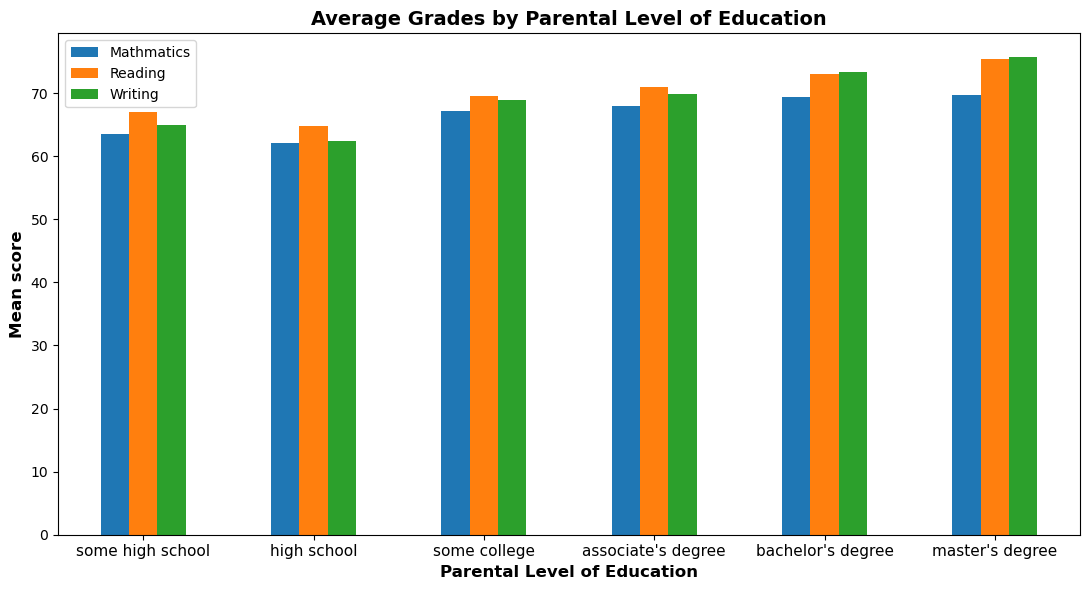

In [103]:
# Aqui eu calculei a média das notas dos alunos para cada nível de educação dos pais
mean_scores_by_parental_education = df.groupby('parental level of education').mean(numeric_only=True) # Sempre lembrar de dar numeric_only nessa versão

# Ordenando os dados pelo índice para manter a ordem dos níveis de educação (Precisei do ChatGPT para isso, fica legal assim)
mean_scores_by_parental_education = mean_scores_by_parental_education.reindex(['some high school', 'high school', 
                                                                              'some college', "associate's degree",
                                                                              "bachelor's degree", "master's degree"])
# Pronto, agora plotei o gráfico de barras
mean_scores_by_parental_education[['math score', 'reading score', 'writing score']].plot(
    kind='bar',
    figsize=(11, 6)
)
plt.title('Average Grades by Parental Level of Education', fontsize=14, fontweight='bold')
plt.xlabel('Parental Level of Education', fontsize=12, fontweight='bold')
plt.ylabel('Mean score', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11, rotation=0, ha='center')
plt.legend(['Mathmatics', 'Reading', 'Writing'])
plt.tight_layout(h_pad=1.5)
plt.show()

2. Gender comparative analysisAnalysis

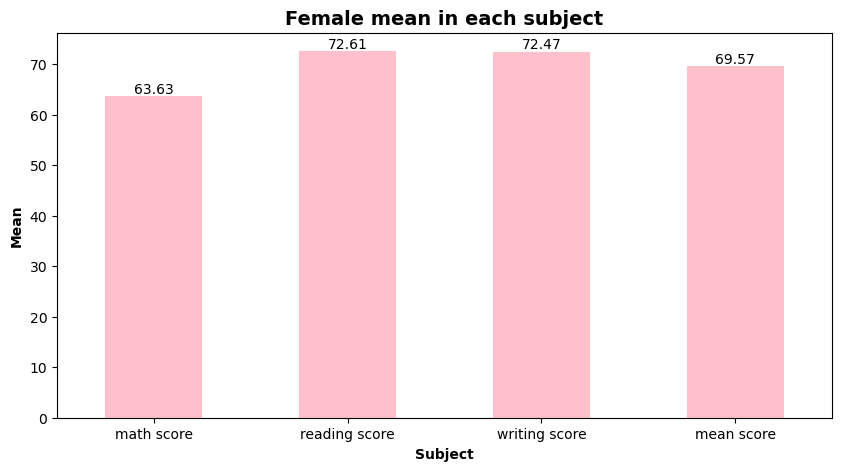

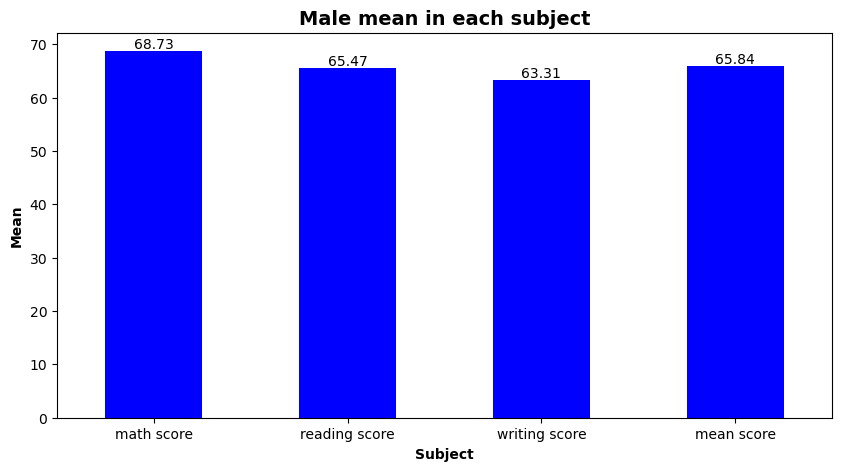

In [26]:
# Primeiro eu resolvi criar uma coluna para armazenar a média da nota dos alunos nas 3 matérias:
df["mean score"] = round((df["math score"] + df["reading score"] + df["writing score"]) / 3, 1) 

# Depois eu quis pegar a média por gênero em cada uma das 3 matérias:
female_mean = df[df['gender'] == 'female'][['math score', 'reading score', 'writing score', 'mean score']].mean()
male_mean = df[df['gender'] == 'male'][['math score', 'reading score', 'writing score', 'mean score']].mean()

# Agora eu vou plotar o gráfico para as médias femininas
plt.figure(figsize=(10, 5))
female_mean.plot(kind='bar', color='pink')
plt.title('Female mean in each subject', fontsize=14, fontweight='bold')
plt.xlabel('Subject', fontweight='bold')
plt.ylabel('Mean', fontweight='bold')
plt.xticks(rotation=0)
# Adicionei os valores das médias nas barras
for i, valor in enumerate(female_mean):
    plt.annotate(round(valor, 2), xy=(i, valor), ha='center', va='bottom')
plt.show()

# E agora o gráfico para as médias masculinas
plt.figure(figsize=(10, 5))
male_mean.plot(kind='bar', color='blue')
plt.title('Male mean in each subject', fontsize=14, fontweight='bold')
plt.xlabel('Subject', fontweight='bold')
plt.ylabel('Mean', fontweight='bold')
plt.xticks(rotation=0)
# Adicionei os valores das médias
for i, valor in enumerate(male_mean):
    plt.annotate(round(valor, 2), xy=(i, valor), ha='center', va='bottom')
plt.show()

### *1.4 Conclusões*

In [55]:
#Insira aqui as conclusões que você conseguiu absorver a partir desse Dataset.
print(
"""
1) Outliers: podemos ver que existem outliers nas notas dos alunos, entretanto, conversando com Felipe, resolvi não tratá-los por hora, pois iremos aprender isso quando formos lidar com ML de fato.

2) Valores das notas pela educação parental: aqui vemos uma triste realidade, na qual os filhos que tem pais com apenas ensino médio completo tendem a ter notas mais baixas que a média - provavelmente devido a problemas financeiros ou por falta de ajuda nos deveres de casa...

3) Valores das notas por gênero: podemos concluir que em geral as notas femininas são melhores que as masculinas, porém podemos ver também que as masculinas são mais altas que as femininas em Matemática - inferindo, a apartir dos dados, que os homens tem mais afinidade pela área. Enquanto as mulheres tem mais afinidade pela leitura e pela escrita.
"""
)


1) Outliers: podemos ver que existem outliers nas notas dos alunos, entretanto, conversando com Felipe, resolvi não tratá-los por hora, pois iremos aprender isso quando formos lidar com ML de fato.

2) Valores das notas pela educação parental: aqui vemos uma triste realidade, na qual os filhos que tem pais com apenas ensino médio completo tendem a ter notas mais baixas que a média - provavelmente devido a problemas financeiros ou por falta de ajuda nos deveres de casa...

3) Valores das notas por gênero: podemos concluir que em geral as notas femininas são melhores que as masculinas, porém podemos ver também que as masculinas são mais altas que as femininas em Matemática - inferindo, a apartir dos dados, que os homens tem mais afinidade pela área. Enquanto as mulheres tem mais afinidade pela leitura e pela escrita.



### **Questão 2:** *Indicadores de Mudança de Clima*


Examine as tendências de mudança de temperatura ao longo dos anos, conforme apresentado no arquivo 'q2_clima.csv'. Analise como diferentes países e regiões têm experimentado variações na temperatura média ao longo do tempo. Além disso, explore possíveis correlações entre o grau de variação de temperatura e fatores geográficos ou econômicos dos países.

###*2.1 Imports*

In [ ]:
#Insira seu código aqui

###*2.2 Dataset*

In [ ]:
#Insira seu código aqui

### *2.3 Vizualização*

In [ ]:
#Insira seu código aqui

###*2.4 Conclusões*

In [ ]:
#Insira aqui as conclusões que você conseguiu absorver a partir desse Dataset.
Conclusoes = ""






print(Conclusoes)

### **Questão 3:** *Saúde Mental*


Examine as variações e tendências em questões de saúde mental em diferentes países e regiões, utilizando os dados apresentados no arquivo "q3_saude_mental.csv". Foque na análise da incidência de condições de saúde mental, uso de serviços de saúde mental, e atitudes gerais em relação a esses problemas ao longo do tempo. Procure estabelecer correlações entre os padrões de saúde mental e fatores socioeconômicos, políticas de saúde pública e características culturais dos países envolvidos. Esta investigação aprofundada permitirá uma compreensão mais rica das dinâmicas globais da saúde mental, destacando tendências significativas e identificando áreas específicas de preocupação em diferentes contextos regionais. Explore essas dimensões para elaborar estratégias efetivas de conscientização e intervenção em saúde mental globalmente.







###*3.1 Imports*

In [ ]:
#Insira seu código aqui

###*3.2 Dataset*

In [ ]:
#Insira seu código aqui

### *3.3 Vizualização*

In [ ]:
#Insira seu código aqui

###*3.4 Conclusões*

In [ ]:
#Insira aqui as conclusões que você conseguiu absorver a partir desse Dataset.
Conclusoes = ""






print(Conclusoes)

### **Questão 4:** *Top Músicas do Spotify*

Investigue as características das músicas mais populares no Spotify, conforme listadas no arquivo 'q4_spotify.csv'. Analise se há correlações entre características como dançabilidade, energia e valência com o sucesso da música, medido pelo número de streams e presença em playlists. Além disso, examine como essas características variam entre diferentes gêneros musicais e ao longo dos anos.

### *Código*

In [ ]:
#Insira seu código aqui, lembre-se de dividir as diferentes etapas de realização da questão para manter a organização!

###*Conclusões*

In [ ]:
#Insira aqui as conclusões que você conseguiu absorver a partir desse Dataset.
Conclusoes = ""






print(Conclusoes)